In [456]:
import os
import datetime
import pandas as pd
import yfinance as yf
import FinanceDataReader as fdr
from pandas_datareader import data as pdr
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np   
import warnings
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [982]:
#input 받아오는걸로 바꾸기
start_year = "2020" #01-01
end_year = "2023-12-31" # 12-31
initial_amount = "10000"

allocation1 = {"allocation1_1":40, "allocation2_1": 20, "allocation3_1":10, "allocation4_1":10, "allocation5_1": 10, "allocation6_1":10}
market1 = {"market1_1":"Korea Stock Market", "market2_1":"Korea Stock Market","market3_1":"Korea Stock Market","market4_1":"Korea Stock Market","market5_1":"Korea Stock Market","market6_1":"Korea Stock Market"}
item1 = {"item1_1":'AJ네트웍스',"item2_1":"AK홀딩스","item3_1":"BGF","item4_1":"삼성전자","item5_1":"아모레퍼시픽", "item6_1":"카카오"}

### 종목명 받아오기 - dict type

In [767]:
def get_names(market):
    us_names = {}
    korea_names = {}
    names = {}

    nyse_path = "/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/NYSE개별종목1"
    nasdaq_path = "/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/Nasdaq개별종목1"
    amex_path = "/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/AMEX개별종목1"
    kospi_path = "/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/Kospi개별종목"
    kosdaq_path = "/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/Kosdaq개별종목"
    konex_path = "/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/KONEX개별종목"

    if market == "US Stock Market":
        names = us_names
        paths = {"nyse": nyse_path, "nasdaq": nasdaq_path, "amex": amex_path}
    elif market == "Korea Stock Market":
        names = korea_names
        paths = {"kospi": kospi_path, "kosdaq": kosdaq_path, "konex": konex_path}

    for key, path in paths.items():
        if os.path.exists(path):
            name_list = []
            for root, _, files in os.walk(path):
                for file in files:
                    if file.endswith(".csv"):
                        file_path = os.path.join(root, file)
                        if not is_csv_empty(file_path):
                            name_list.append(file.split('.')[0])
            names[key] = name_list

    return names, paths

def is_csv_empty(file_path):
    try:
        df = pd.read_csv(file_path)
        return df.empty
    except Exception as e:
        print(f"Error reading file '{file_path}': {e}")
        return True


In [591]:
us_stock_names = get_names("US Stock Market")
korea_stock_names = get_names("Korea Stock Market")

In [543]:
us_paths

{'nyse': '/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/NYSE개별종목1',
 'nasdaq': '/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/Nasdaq개별종목1',
 'amex': '/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/AMEX개별종목1'}

### 종목명 - csv type으로 저장

In [572]:
import os
import csv

# Define the paths
paths = {
    'nyse': "/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/NYSE개별종목1",
    'nasdaq': "/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/Nasdaq개별종목1",
    'amex': "/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/AMEX개별종목1",
    # 'kospi': "/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/Kospi개별종목",
    # 'kosdaq': "/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/Kosdaq개별종목",
    # 'konex': "/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/KONEX개별종목"
}

# Create an empty list to store filenames
all_filenames = []

# CSV file path
csv_file_path = "file_names_us.csv"

# Check if the CSV file exists and has content
file_exists = os.path.exists(csv_file_path) and os.path.getsize(csv_file_path) > 0

# Function to check file size
def is_valid_csv(file_path):
    return os.path.exists(file_path) and os.path.getsize(file_path) >= 3  # 3 bytes or more

# Function to get filenames without extension
def get_filename_without_extension(filename):
    return os.path.splitext(filename)[0]

# Set to store filenames
all_filenames = set()

# If the file exists, read existing data
if file_exists:
    with open(csv_file_path, 'r') as csv_file:
        reader = csv.reader(csv_file)
        next(reader)  # Skip the header row
        all_filenames.update(row[0] for row in reader)

# Iterate through the paths and list all files
for key, path in paths.items():
    if os.path.exists(path) and os.path.isdir(path):
        filenames = [get_filename_without_extension(f) for f in os.listdir(path) if f.endswith('.csv') and is_valid_csv(os.path.join(path, f))]
        all_filenames.update(filenames)

# Write the updated filenames to the CSV file
with open(csv_file_path, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    if not file_exists:
        writer.writerow(['Filename'])  # Write the header
    writer.writerows([[filename] for filename in sorted(all_filenames)])

print(f"File names have been saved to {csv_file_path}")


File names have been saved to file_names_us.csv


### 포트폴리오 비율 (pie chart)

In [461]:
def port_allocation_pie(allocation, market, item):
    result = []
    
    for key, value in allocation1.items():
        # Extract the number (e.g., '1' from 'allocation1_1')
        number = key.split('allocation')[1].split('_')[0]

        # Construct the corresponding item and market key
        item_key = f'item{number}_1'
        market_key = f'market{number}_1'

        # Get the corresponding item and market name
        item_name = item1.get(item_key, 'Unknown Item')
        market_name = market1.get(market_key, 'Unknown Market')

        # Combine item and market name
        full_name = f"{item_name}"

        # Add to the result list
        result.append({
            "name": full_name,
            "ratio": value
        })

    return result

In [462]:
print(port_allocation_pie(allocation1,market1,item1))

[{'name': 'Apple Inc_AAPL', 'ratio': 50}, {'name': '삼성전자', 'ratio': 20}, {'name': '국일제지', 'ratio': 30}]


### performance summary

In [735]:
us_stock_names, us_paths = get_names("US Stock Market")
korea_stock_names, korea_paths = get_names("Korea Stock Market")

In [588]:
import json
korea_names= "korea_stock_names.json"

with open(korea_names, "w", encoding='utf-8') as file:
    json.dump(korea_stock_names, file, indent=4)


In [589]:
import json
us_names= "us_stock_names.json"

with open(us_names, "w", encoding='utf-8') as file:
    json.dump(us_stock_names, file, indent=4)


In [511]:
import json
us_paths_json= "us_paths.json"

with open(us_paths_json, "w", encoding='utf-8') as file:
    json.dump(us_paths, file, indent=4)


In [512]:
import json
korea_paths_json= "korea_paths.json"

with open(korea_paths_json, "w", encoding='utf-8') as file:
    json.dump(korea_paths, file, indent=4)


In [768]:


def find_market_for_item(item, us_stock_names, korea_stock_names):
    for market, names in us_stock_names.items():
        for name in names:
            if item == name:
                return "US Stock Market", market
    for market, names in korea_stock_names.items():
        for name in names:
            if item == name:
                return "Korea Stock Market", market
    return None, None

def read_stock_prices(item, market, path,start,end):
    file_path = os.path.join(path, f"{item}.csv")
    print(file_path)
    try:
        price = pd.read_csv(file_path)
        price.set_index('Date', inplace=True)
        price = price[start:end]
        null_or_nan_rows = price[
            price.Close.isna() |
            price.Close.isnull() |
            (price.Close < 1e-8)
        ]
        price = price.drop(null_or_nan_rows.index)

        return price
    except Exception as e:
        print(f"Error reading file '{file_path}': {e}")
    return None

In [769]:
for key, item in item1.items():
    print(key,item)
    market, market_key = find_market_for_item(item, us_stock_names, korea_stock_names)
    print(market,market_key)
    if market == "US Stock Market":
        path = us_paths[market_key]
    elif market == "Korea Stock Market":
        path = korea_paths[market_key]

    else:
        print(f"Market not found for {item}")
        continue

    closing_prices = read_stock_prices(item, market, path,start_year,end_year)
    if closing_prices is not None:
        print(f"Closing prices for {item}:\n{closing_prices}")
    else:
        print(f"Data not available for {item}")

item1_1 AJ네트웍스
Korea Stock Market kospi
/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/Kospi개별종목/AJ네트웍스.csv
Closing prices for AJ네트웍스:
            Open  High   Low  Close  Volume    Change
Date                                                 
2020-01-02  4900  5140  4895   5050  210107  0.016097
2020-01-03  5050  5150  5030   5100  128274  0.009901
2020-01-06  5080  5080  4950   5030  162087 -0.013725
2020-01-07  5030  5100  4965   5030   42008  0.000000
2020-01-08  5050  5060  4735   4935  110827 -0.018887
...          ...   ...   ...    ...     ...       ...
2023-11-06  4000  4085  3995   4075   87485  0.011166
2023-11-07  4030  4070  3990   4030   52285 -0.011043
2023-11-08  4035  4060  3995   4045   41161  0.003722
2023-11-09  4040  4050  4010   4045   25246  0.000000
2023-11-10  4045  4045  3990   4025   28309 -0.004944

[954 rows x 6 columns]
item2_1 AK홀딩스
Korea Stock Market kospi
/Users/sunyoungpark/Library/Mobile Documents/com~apple~Cl

In [950]:
def calc_returns(srs, offset=1):
    returns = srs / srs.shift(offset) - 1.0
    return returns
    
def port_returns(names, weights, start, end=None):
    port = pd.DataFrame()
    for i in range(len(names)):
        item = names[i]
        weight = weights[i] / 100.0  # Convert percentage to decimal

        # Find the market and path for each item
        market, market_key = find_market_for_item(item, us_stock_names, korea_stock_names)
        if market == "US Stock Market":
            path = us_paths[market_key]
        elif market == "Korea Stock Market":
            path = korea_paths[market_key]
        else:
            print(f"Market not found for {item}")
            continue

        # Read stock prices
        data = read_stock_prices(item, market, path, start, end)
        if data is not None:
            port[f"daily_returns_{item}"] = calc_returns(data['Close']) * weight
            port[f"next_day_returns_{item}"] = port[f"daily_returns_{item}"].shift(-1)

    port["daily_returns_port"] = port.filter(like="daily_returns").sum(axis=1)
    port["next_day_returns_port"] = port["daily_returns_port"].shift(-1)

    return port


In [983]:
names = list(item1.values())
weights = [allocation1[key] for key in sorted(allocation1.keys())]
portfolio_returns = port_returns(names, weights, start_year, end_year)
print(names)

/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/Kospi개별종목/AJ네트웍스.csv
/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/Kospi개별종목/AK홀딩스.csv
/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/Kospi개별종목/BGF.csv
/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/Kospi개별종목/삼성전자.csv
/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/Kospi개별종목/아모레퍼시픽.csv
/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/Kospi개별종목/카카오.csv
['AJ네트웍스', 'AK홀딩스', 'BGF', '삼성전자', '아모레퍼시픽', '카카오']


In [772]:
def read_first_price(names):
    first_dates ={}
    for i in range(len(names)):
        item = names[i]

        # Find the market and path for each item
        market, market_key = find_market_for_item(item, us_stock_names, korea_stock_names)
        if market == "US Stock Market":
            path = us_paths[market_key]
        elif market == "Korea Stock Market":
            path = korea_paths[market_key]
        else:
            print(f"Market not found for {item}")
            continue
        print(path)
        
        path = os.path.join(path, f"{item}.csv")
        try:
            price = pd.read_csv(path)
            price.set_index('Date', inplace=True)
            price.index = pd.to_datetime(price.index)  # Ensure the index is in datetime format

            null_or_nan_rows = price[
                price.Close.isna() |
                price.Close.isnull() |
                (price.Close < 1e-8)
            ]
            price = price.drop(null_or_nan_rows.index)
            first_date = price.index[0].strftime('%Y-%m-%d')
            first_dates[item] = first_date
            # Return the first date in the index
        except Exception as e:
            print(f"Error reading file '{path}': {e}")
            return None # Return None or an appropriate default value if there is an error

    return first_dates

In [900]:
names = list(item1.values())


print(read_first_price(names))

/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/Kospi개별종목
/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/Kospi개별종목
/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/Kospi개별종목
/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/Kospi개별종목
/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/Kospi개별종목
/Users/sunyoungpark/Library/Mobile Documents/com~apple~CloudDocs/SNU/2023-2학기/시각화/project/Kospi개별종목
{'AJ네트웍스': '2015-08-21', 'AK홀딩스': '1999-08-11', 'BGF': '2014-05-19', '삼성전자': '1999-07-26', '아모레퍼시픽': '2006-06-29', '카카오': '1999-11-11'}


In [901]:
#Long-only strategy
# Rescale volatility for comparison
def rescale_to_target_volatility(srs,vol=0.15):
    return srs *  vol / srs.std() / np.sqrt(252)

def plot_captured_returns(next_day_captured, initial_amount, plot_with_equal_vol=None):
    """ 
    Parameters:
        next_day_captured: time-series of next day returns
        initial_amount: initial amount to be invested
        plot_with_equal_vol: target volatility (if None, use original volatility)
    Return:
        matplotlib.pyplot of cumulative returns multiplied by initial amount
    """
    
    if plot_with_equal_vol is not None:
        srs = rescale_to_target_volatility(next_day_captured.copy(), vol=plot_with_equal_vol)
    else:
        srs = next_day_captured.copy()


    cumulative_returns = ((srs.shift(1) + 1).cumprod()) * initial_amount

    cumulative_returns.plot()
    plt.ylabel("Cumulative Returns")
    plt.title("Cumulative Returns Over Time")
    plt.show()


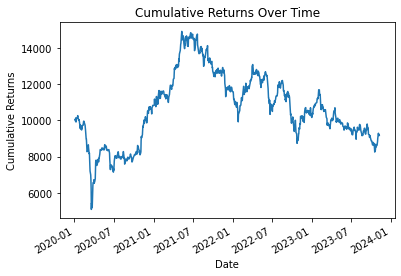

In [902]:
# Load long-only returns and plot
captured_returns_longonly = portfolio_returns['next_day_returns_port']
plot_captured_returns(captured_returns_longonly, int(initial_amount))

In [903]:
# cumulative return data 받아오는 곳!

def convert_to_js_format(series, initial_amount, plot_with_equal_vol=None):
    if plot_with_equal_vol is not None:
        series = rescale_to_target_volatility(series.copy(), vol=plot_with_equal_vol)
    else:
        series = series.copy()

    cumulative_returns = ((series.shift(1) + 1).cumprod()) * initial_amount
    cumulative_returns.iloc[0] = initial_amount

    js_format_data = [{"date": str(date), "return": ret} for date, ret in cumulative_returns.iteritems()]
    return js_format_data

# Example usage
initial_amount = 10000
captured_returns_longonly = portfolio_returns['next_day_returns_port']
js_data = convert_to_js_format(captured_returns_longonly, initial_amount)

js_data


/var/folders/zc/g645n79d7qvdxrfg8gg194k80000gn/T/ipykernel_6662/1849052067.py:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  js_format_data = [{"date": str(date), "return": ret} for date, ret in cumulative_returns.iteritems()]


[{'date': '2020-01-02 00:00:00', 'return': 10000.0},
 {'date': '2020-01-03 00:00:00', 'return': 10056.867437723613},
 {'date': '2020-01-06 00:00:00', 'return': 9962.754059944167},
 {'date': '2020-01-07 00:00:00', 'return': 10142.638603465262},
 {'date': '2020-01-08 00:00:00', 'return': 9914.487817051184},
 {'date': '2020-01-09 00:00:00', 'return': 10079.816669660906},
 {'date': '2020-01-10 00:00:00', 'return': 10103.749632882602},
 {'date': '2020-01-13 00:00:00', 'return': 10139.597762404002},
 {'date': '2020-01-14 00:00:00', 'return': 10160.681927540014},
 {'date': '2020-01-15 00:00:00', 'return': 10195.922915522335},
 {'date': '2020-01-16 00:00:00', 'return': 10268.335853001081},
 {'date': '2020-01-17 00:00:00', 'return': 10170.1807972996},
 {'date': '2020-01-20 00:00:00', 'return': 10016.671160230459},
 {'date': '2020-01-21 00:00:00', 'return': 10015.046667094652},
 {'date': '2020-01-22 00:00:00', 'return': 10050.849620530586},
 {'date': '2020-01-23 00:00:00', 'return': 9993.0001536

### Annual returns

In [1003]:

def annual_returns(series, initial_amount, plot_with_equal_vol=None):
    if not isinstance(series.index, pd.DatetimeIndex):
        series.index = pd.to_datetime(series.index)
    if not isinstance(series.index, pd.DatetimeIndex):
        series.index = pd.to_datetime(series.index)
    if plot_with_equal_vol is not None:
        series = rescale_to_target_volatility(series.copy(), vol=plot_with_equal_vol)
    else:
        series = series.copy()

    # Convert daily returns to cumulative balance
    cumulative_balance = ((series.shift(1) + 1).cumprod()) * float(initial_amount)
    cumulative_balance.iloc[0] = float(initial_amount)

    # Resample to get year-start and year-end values
    annual_start = cumulative_balance.resample('YS').first()
    annual_end = cumulative_balance.resample('Y').last()

    # Calculate annual returns
    annual_returns = (annual_end.values - annual_start.values) / annual_start.values

    # Convert to JavaScript-friendly format
    js_format_data = [{"year": str(year.year), "return": ret} for year, ret in zip(annual_end.index, annual_returns)]
    return js_format_data



# Example usage
captured_returns_longonly = portfolio_returns['next_day_returns_port']
js_data = annual_returns(captured_returns_longonly, initial_amount)
print(js_data)


[{'year': '2020', 'return': 0.08234761372911945}, {'year': '2021', 'return': 0.06895202824543405}, {'year': '2022', 'return': -0.10690910856560087}, {'year': '2023', 'return': -0.09748952030471482}]


In [905]:
def calc_downside_deviation(srs):
    """ Parameters:
            srs: pandas time-series
        Return:
            Downside Deviation (defined above) """
    negative_returns = srs.apply(lambda x: x if x < 0 else np.nan).dropna() * np.sqrt(252)
    return negative_returns.std()

def calc_max_drawdown(srs):
    """ Parameters:
            srs: pandas time-series
        Return:
            MDD (defined above) """
    cumulative_max = srs.cummax()
    drawdown = cumulative_max - srs
    return drawdown.max()

def calc_profit_and_loss_ratio(srs):
    """ Parameters:
            srs: pandas time-series
        Return:
            PnL ratio (defined above) """
    return np.mean(srs[srs>0])/np.mean(np.abs(srs[srs<0]))

In [906]:
def calculate_statistics(cum_data,next_day_captured, print_results=True):
    """ Parameters:
            srs: pandas time-series
            print_results: bool to print statistics
        Return:
            Metrics and risk adjusted performance metrics (defined above) """
    
    
    srs = next_day_captured.shift(1)
    mean = srs.mean()
    vol = srs.std()
    
    # Calculate annualised metrics:
    returns_annualised =  mean*252
    vol_annualised = vol*np.sqrt(252)
    downside_devs_annualised = calc_downside_deviation(srs)
    max_drawdown = calc_max_drawdown(srs)
    pnl_ratio = calc_profit_and_loss_ratio(srs)
    perc_positive_return = len(srs[srs>0])/len(srs)
    initial_amount = cum_data[0]['return']
    final_amount = cum_data[-1]['return']
    
    """
        Exercise: complete the following ratio definitions
    """
    # Calculate risk-adjusted performance metrics:
    
    ### Enter code here:
    sharpe = mean/vol*np.sqrt(252)   
    sortino = mean / downside_devs_annualised * 252
    calmar = mean / max_drawdown * 252
    ###
    
    # Print results
    if print_results:

        print("\033[4mPerformance Metrics:\033[0m")
        print(initial_amount)
        print(final_amount)
        print(f"Annualised Returns = {returns_annualised:.2%}")
        print(f"Annualised Volatility = {vol_annualised:.2%}")
        # print(f"Downside Deviation = {downside_devs_annualised:.2%}")
        print(f"Maximum Drawdown = {max_drawdown:.2%}")
        print(f"Sharpe Ratio = {sharpe:.2f}")
        print(f"Sortino Ratio = {sortino:.2f}")
        # print(f"Calmar Ratio = {calmar:.2f}")
        print(f"Percentage of positive returns = {perc_positive_return:.2%}")
        print(f"Profit/Loss ratio = {pnl_ratio:.3f}")

   
    # Return performance metrics
    return [{
        "initial_amount" : initial_amount,
        "fianl_amount" : final_amount,
        "returns_annualised":  returns_annualised,
        "vol_annualised": vol_annualised,
        # "downside_deviation_annualised": downside_devs_annualised,
        "max_drawdown": max_drawdown,
        "sharpe": sharpe,
        "sortino": sortino,
        # "calmar": calmar,
        "pnl_ratio": pnl_ratio,
      }]

# Calculate performance metrics for basic long-only strategy defined
stats_longonly = calculate_statistics(js_data,captured_returns_longonly)
print(stats_longonly)

Performance Metrics:
0.08234761372911945
-0.09748952030471482
Annualised Returns = 1.67%
Annualised Volatility = 27.93%
Maximum Drawdown = 20.69%
Sharpe Ratio = 0.06
Sortino Ratio = 0.08
Percentage of positive returns = 51.36%
Profit/Loss ratio = 0.955
[{'initial_amount': 0.08234761372911945, 'fianl_amount': -0.09748952030471482, 'returns_annualised': 0.016706966219901826, 'vol_annualised': 0.2792694918965547, 'max_drawdown': 0.2069359309279167, 'sharpe': 0.05982381428935432, 'sortino': 0.0766636212899068, 'pnl_ratio': 0.9553008054460019}]


In [930]:
def read_close_prices(names,start,end):
    port = pd.DataFrame()
    first_dates =""
    for i in range(len(names)):
        item = names[i]

        # Find the market and path for each item
        market, market_key = find_market_for_item(item, us_stock_names, korea_stock_names)
        if market == "US Stock Market":
            path = us_paths[market_key]
        elif market == "Korea Stock Market":
            path = korea_paths[market_key]
        else:
            print(f"Market not found for {item}")
            continue
        print(item, path)
        
        path = os.path.join(path, f"{item}.csv")
        price = pd.read_csv(path)
        price.set_index('Date', inplace=True)
        price = price[start:end]

        null_or_nan_rows = price[
                    price.Close.isna() |
                    price.Close.isnull() |
                    (price.Close < 1e-8)
                ]
        price = price.drop(null_or_nan_rows.index)
        price = price[['Close']]
        port[f"{item}"] = price

        
    return port


#Define frequently used functions.
# r is each stock's return, w is the portion of each stock in our portfolio, and covar is the covariance matrix
# Rate of return
def ret(r,w):
    return r.dot(w)
# Risk level - or volatility
def vol(w,annual_covar):
    return np.sqrt(np.dot(w,np.dot(w,annual_covar)))

def sharpe (ret,vol):
    return ret/vol


In [931]:
close = backtest.read_close_prices(names,start_year,end_year)
pct_chg = close.pct_change()

df=pct_chg.iloc[1:len(pct_chg.index),:]
df = df.dropna()

r = np.mean(df,axis=0)*252
covar = df.cov() * 252
print(close)

AJ네트웍스 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
AK홀딩스 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
BGF /Users/sunyoungpark/시각화_practice/d3backend/Kospi
삼성전자 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
아모레퍼시픽 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
카카오 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
            AJ네트웍스  AK홀딩스   BGF   삼성전자  아모레퍼시픽    카카오
Date                                                 
2020-01-02    5050  34850  5500  55200  207500  30609
2020-01-03    5100  34950  5560  55500  206500  30609
2020-01-06    5030  34600  5370  55500  207000  31010
2020-01-07    5030  35300  5500  55800  222500  32114
2020-01-08    4935  33750  5290  56800  214000  32014
...            ...    ...   ...    ...     ...    ...
2023-11-06    4075  18230  3555  70900  143300  44700
2023-11-07    4030  17850  3550  70900  143600  43750
2023-11-08    4045  17780  3520  69900  142800  43950
2023-11-09    4045  17660  3535  70300  145000  45600
2023-11-10    4025  17780

In [916]:
from scipy.optimize import Bounds
from scipy.optimize import minimize
from scipy.optimize import LinearConstraint

def min_sharpe(names, start_year,end_year,w,annual_covar):

    close = backtest.read_close_prices(names,start_year,end_year)
    pct_chg = close.pct_change()

    df=pct_chg.iloc[1:len(pct_chg.index),:]
    df = df.dropna()

    r = np.mean(df,axis=0)*252
    covar = df.cov() * 252

    bounds = Bounds(0, 1)
    linear_constraint = LinearConstraint(np.ones((pct_chg.shape[1],), dtype=int),1,1)
    weights_min = np.ones(pct_chg.shape[1])
    x0 = weights_min/np.sum(weights_min)
    #Define a function to calculate volatility
    fun1 = lambda w: np.sqrt(np.dot(w,np.dot(w,annual_covar)))
    res = minimize(fun1,x0,method='trust-constr',constraints = linear_constraint,bounds = bounds)

    w_min = res.x

    np.set_printoptions(suppress = True, precision=2)
    w_min_ratio = {}
    for i in range(len(names)):
        w_min_ratio[names[i]] = w_min[i]
    w_min_return = backtest.ret(r,w_min)
    w_min_vol = backtest.vol(w_min,annual_covar)
    w_min_sharpe = w_min_return / w_min_vol

    # print('return: % .2f'% (backtest.ret(r,w_min)*100), 'risk: % .3f'% backtest.vol(w_min,annual_covar))
    return {'return: % .2f'% w_min_return, 'risk: % .3f'% w_min_vol,'sharpe: % .2f'% w_min_sharpe }

In [917]:
print(min_sharpe(names, start_year, end_year, weights,covar))

AJ네트웍스 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
AK홀딩스 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
BGF /Users/sunyoungpark/시각화_practice/d3backend/Kospi
삼성전자 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
아모레퍼시픽 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
카카오 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
{'return:  0.06', 'sharpe:  0.29', 'risk:  0.224'}


In [1021]:
def max_sharpe(names, start_year,end_year,w,annual_covar):

    close = backtest.read_close_prices(names,start_year,end_year)
    pct_chg = close.pct_change()

    df=pct_chg.iloc[1:len(pct_chg.index),:]
    df = df.dropna()

    r = np.mean(df,axis=0)*252
    covar = df.cov() * 252

    bounds = Bounds(0, 1)
    linear_constraint = LinearConstraint(np.ones((pct_chg.shape[1],), dtype=int),1,1)
    weights_max = np.ones(pct_chg.shape[1])
    x0 = weights_max/np.sum(weights_max)
    #max sharpe
    fun2 = lambda w: np.sqrt(np.dot(w,np.dot(w,annual_covar)))/r.dot(w)
    res_sharpe = minimize(fun2,x0,method='trust-constr',constraints = linear_constraint,bounds = bounds)

    #These are the weights of the stocks in the portfolio with the highest Sharpe ratio.
    w_max = res_sharpe.x
    print(w_max)

    np.set_printoptions(suppress = True, precision=2)

    w_max_ratio = {}
    for i in range(len(names)):
        w_max_ratio[names[i]] = w_max[i]
    w_max_return = backtest.ret(r,w_max)
    w_max_vol = backtest.vol(w_max,annual_covar)
    w_max_sharpe = w_max_return / w_max_vol


    # print(w_sharpe)
    # print('return: % .2f'% (ret(r,w_sharpe)), 'risk: % .3f'% vol(w_sharpe,annual_covar))
    return {'return': w_max_return, 'risk': w_max_vol, 'sharpe':  w_max_sharpe }


In [915]:
#input 받아오는걸로 바꾸기
start_year = "2020" #01-01
end_year = "2023-12-31" # 12-31
initial_amount = "10000"

allocation1 = {"allocation1_1":40, "allocation2_1": 20, "allocation3_1":10, "allocation4_1":10, "allocation5_1": 10, "allocation6_1":10}
market1 = {"market1_1":"Korea Stock Market", "market2_1":"Korea Stock Market","market3_1":"Korea Stock Market","market4_1":"Korea Stock Market","market5_1":"Korea Stock Market","market6_1":"Korea Stock Market"}
item1 = {"item1_1":'AJ네트웍스',"item2_1":"AK홀딩스","item3_1":"BGF","item4_1":"삼성전자","item5_1":"아모레퍼시픽", "item6_1":"카카오"}

In [924]:
print(max_sharpe(names, start_year, end_year, weights,covar))

AJ네트웍스 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
AK홀딩스 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
BGF /Users/sunyoungpark/시각화_practice/d3backend/Kospi
삼성전자 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
아모레퍼시픽 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
카카오 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
{'risk:  0.275', 'sharpe:  0.51', 'return:  0.14'}


In [991]:
def provided_sharpe(names, start_year,end_year,w,annual_covar):

    close = backtest.read_close_prices(names,start_year,end_year)
    pct_chg = close.pct_change()

    df=pct_chg.iloc[1:len(pct_chg.index),:]
    df = df.dropna()

    r = np.mean(df,axis=0)*252
    covar = df.cov() * 252

    bounds = Bounds(0, 1)
    linear_constraint = LinearConstraint(np.ones((pct_chg.shape[1],), dtype=int),1,1)
    weights = np.ones(pct_chg.shape[1])
    x0 = weights/np.sum(weights)
    #max sharpe
    fun2 = lambda w: np.sqrt(np.dot(w,np.dot(w,annual_covar)))/r.dot(w)
    res_sharpe = minimize(fun2,x0,method='trust-constr',constraints = linear_constraint,bounds = bounds)

    #These are the weights of the stocks in the portfolio with the highest Sharpe ratio.
    w_port = w.copy()
    for i in range(len(w_port)):
        w_port[i] = w_port[i]/100
    print(w_port)

    np.set_printoptions(suppress = True, precision=2)

    w_ratio = {}
    for i in range(len(names)):
        w_ratio[names[i]] = w[i]
    w_return = backtest.ret(r,w)
    w_vol = backtest.vol(w,annual_covar)
    w_sharpe = w_return / w_vol

    # print(w_port)
    # print('return: % .2f'% (ret(r,w_port)), 'risk: % .3f'% vol(w_port,annual_covar))
    return {'return': w_return, 'risk': w_vol, 'sharpe':  w_sharpe }


In [987]:
print(provided_sharpe(names, start_year,end_year, weights, covar))

AJ네트웍스 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
AK홀딩스 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
BGF /Users/sunyoungpark/시각화_practice/d3backend/Kospi
삼성전자 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
아모레퍼시픽 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
카카오 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
[0.4, 0.2, 0.1, 0.1, 0.1, 0.1]
{'return:  1.67', 'sharpe:  0.06', 'risk:  27.927'}


In [1015]:


def provided_calculate_statistics(names, start_year, end_year,cum_data,next_day_captured):
    srs = next_day_captured.shift(1)

    close = backtest.read_close_prices(names,start_year,end_year)
    pct_chg = close.pct_change()

    df=pct_chg.iloc[1:len(pct_chg.index),:]
    df = df.dropna()

    r = np.mean(df,axis=0)*252
    covar = df.cov() * 252
      
    provided_port = provided_sharpe(names, start_year,end_year, weights, covar)
    returns_annualised = provided_port['return']/100
    vol_annualised = provided_port['risk']/100

    downside_devs_annualised = calc_downside_deviation(srs)
    max_drawdown = calc_max_drawdown(srs)
    pnl_ratio = calc_profit_and_loss_ratio(srs)
    perc_positive_return = len(srs[srs>0])/len(srs)
    initial_amount = cum_data[0]['return']
    final_amount = cum_data[-1]['return']
    
    sortino = returns_annualised / downside_devs_annualised * 252

   
    # Return performance metrics
    return [{
        "initial_amount" : initial_amount,
        "fianl_amount" : final_amount,
        "returns_annualised":  returns_annualised,
        "vol_annualised": vol_annualised,
        # "downside_deviation_annualised": downside_devs_annualised,
        "max_drawdown": max_drawdown,
        "sharpe": sharpe,
        "sortino": sortino,
        # "calmar": calmar,
        "pnl_ratio": pnl_ratio,
      }]

# # Calculate performance metrics for basic long-only strategy defined
# stats_longonly = calculate_statistics(js_data,captured_returns_longonly)
# print(stats_longonly)

In [1016]:
print(provided_calculate_statistics(names,start_year,end_year,js_data,captured_returns_longonly))

AJ네트웍스 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
AK홀딩스 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
BGF /Users/sunyoungpark/시각화_practice/d3backend/Kospi
삼성전자 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
아모레퍼시픽 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
카카오 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
AJ네트웍스 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
AK홀딩스 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
BGF /Users/sunyoungpark/시각화_practice/d3backend/Kospi
삼성전자 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
아모레퍼시픽 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
카카오 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
[0.4, 0.2, 0.1, 0.1, 0.1, 0.1]
[{'initial_amount': 0.08234761372911945, 'fianl_amount': -0.09748952030471482, 'returns_annualised': 0.016706966219901833, 'vol_annualised': 0.27926949189655464, 'max_drawdown': 0.2069359309279167, 'sharpe': <function sharpe at 0x1552e1480>, 'sortino': 19.319232565056517, 'pnl_ratio': 0.9553008054460019}]


In [1022]:


def max_calculate_statistics(names, start_year, end_year,cum_data,next_day_captured):
    srs = next_day_captured.shift(1)

    close = backtest.read_close_prices(names,start_year,end_year)
    pct_chg = close.pct_change()

    df=pct_chg.iloc[1:len(pct_chg.index),:]
    df = df.dropna()

    r = np.mean(df,axis=0)*252
    covar = df.cov() * 252
      
    provided_port = max_sharpe(names, start_year,end_year, weights, covar)
    returns_annualised = provided_port['return']/100
    vol_annualised = provided_port['risk']/100

    downside_devs_annualised = calc_downside_deviation(srs)
    max_drawdown = calc_max_drawdown(srs)
    pnl_ratio = calc_profit_and_loss_ratio(srs)
    perc_positive_return = len(srs[srs>0])/len(srs)
    initial_amount = cum_data[0]['return']
    final_amount = cum_data[-1]['return']
    
    sortino = returns_annualised / downside_devs_annualised * 252

   
    # Return performance metrics
    return [{
        "initial_amount" : initial_amount,
        "fianl_amount" : final_amount,
        "returns_annualised":  returns_annualised,
        "vol_annualised": vol_annualised,
        # "downside_deviation_annualised": downside_devs_annualised,
        "max_drawdown": max_drawdown,
        "sharpe": sharpe,
        "sortino": sortino,
        # "calmar": calmar,
        "pnl_ratio": pnl_ratio,
      }]

# # Calculate performance metrics for basic long-only strategy defined
# stats_longonly = calculate_statistics(js_data,captured_returns_longonly)
# print(stats_longonly)

In [1023]:
print(max_calculate_statistics(names,start_year,end_year,js_data,captured_returns_longonly))

AJ네트웍스 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
AK홀딩스 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
BGF /Users/sunyoungpark/시각화_practice/d3backend/Kospi
삼성전자 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
아모레퍼시픽 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
카카오 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
AJ네트웍스 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
AK홀딩스 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
BGF /Users/sunyoungpark/시각화_practice/d3backend/Kospi
삼성전자 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
아모레퍼시픽 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
카카오 /Users/sunyoungpark/시각화_practice/d3backend/Kospi
[0.   0.   0.   0.49 0.   0.51]
[{'initial_amount': 0.08234761372911945, 'fianl_amount': -0.09748952030471482, 'returns_annualised': 0.0014053813102452581, 'vol_annualised': 0.0027519143197439777, 'max_drawdown': 0.2069359309279167, 'sharpe': <function sharpe at 0x1552e1480>, 'sortino': 1.6251237967351035, 'pnl_ratio': 0.9553008054460019}]
